# Create Images for Report
### when Cameramen and test066 images have been used as target input data sets
---

**_Load needed libraries_**

In [1]:
import warnings
warnings.filterwarnings("ignore", message="Numerical issues were encountered ")
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=DeprecationWarning)
    from src.libs.project_libs import *
    pass

/home/franec94/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:35: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  eps=np.finfo(np.float).eps,
/home/franec94/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:597: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  eps=np.finfo(np.float).eps, copy_

In [2]:
from src.utils_cameramen_notebook.utils_graphics import utils_graphics as cameramen_ugraph
from src.utils_cameramen_notebook.utils_graphics import create_plots as cameramen_cplots
from src.utils_cameramen_notebook.dataset_creation_utils import create_quant_dataset as cameramen_cqd

**_Create destination output directory where data will be stored in._**

In [3]:
figures_list : list = []
ts = time.time()
ROOT_DIR = f"./out/results/cameramen_test066/__{ts}"
ROOT_DIR_CAMERAMEN = os.path.join(ROOT_DIR, "cameramen")
ROOT_DIR_TEST066 = os.path.join(ROOT_DIR, "test066")

roots_dir_list: list = [
    ROOT_DIR,
    ROOT_DIR_CAMERAMEN,
    ROOT_DIR_TEST066,
]
for a_root in roots_dir_list:
    try:
        os.makedirs(a_root)
    except Exception as err:
        print(f"Error occuring for root directory: {a_root}")
        print(f"{str(err)}")
        pass
    pass

**_Some Global and Other necessary variables to carry out tasks for current notebook._**

In [4]:
SHOW_CAMERAMEN_FLAG: bool = True
SHOW_TEST066_FLAG: bool = True

In [5]:
pairs_oparams_up:list = [ (25, 6), (32, 4), ]
pairs_oparams_base:list = [ (55, 4), (45, 6), ]
pairs_oparams_op:list = [ (45, 11), (55, 7), ]
pairs_hf_hl = pairs_oparams_up \
    + pairs_oparams_base \
    + pairs_oparams_op

In [6]:
image_name = "cameramen"
quanted_cameramen_df = dataset_loaders.load_quant_dataset(dtype="dataframe")
quanted_cameramen_df["image_name"] = [f"{image_name}"] * quanted_cameramen_df.shape[0]

**_Plot just Jpeg and Plain Siren-DNNs for Cameramen 256x256 Image._**

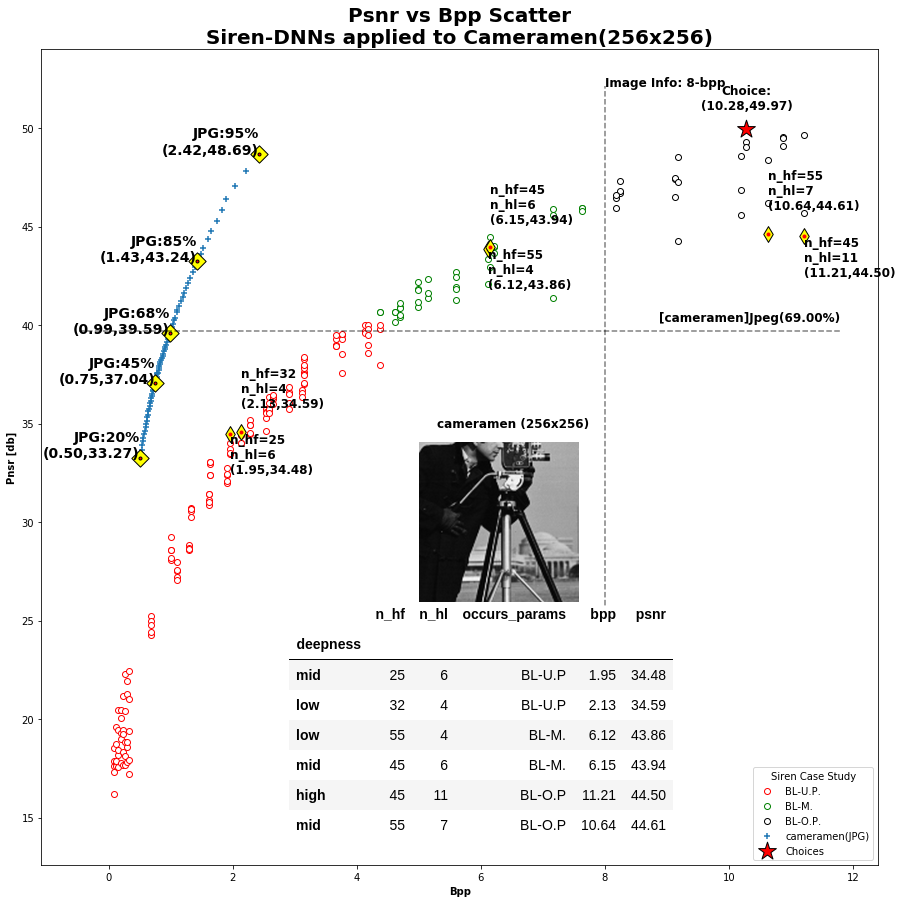

In [7]:
if SHOW_CAMERAMEN_FLAG:
    image_details = dict(
        image_name="cameramen",
        data_shown="jpeg_plain_siren_1",
        root_dir=ROOT_DIR_CAMERAMEN,
    )
    fig_name, fig, ax = cameramen_cplots.show_image_jpeg_plain_siren_bpp_vs_psnr_scatter(
        image_details=image_details,
        pairs_hf_hl=pairs_hf_hl
    )
    figures_list.append(fig_name)
    pass

**_Plot just Jpeg and Plain Siren-DNNs, and Pruned Models - for Cameramen 256x256 Image._**

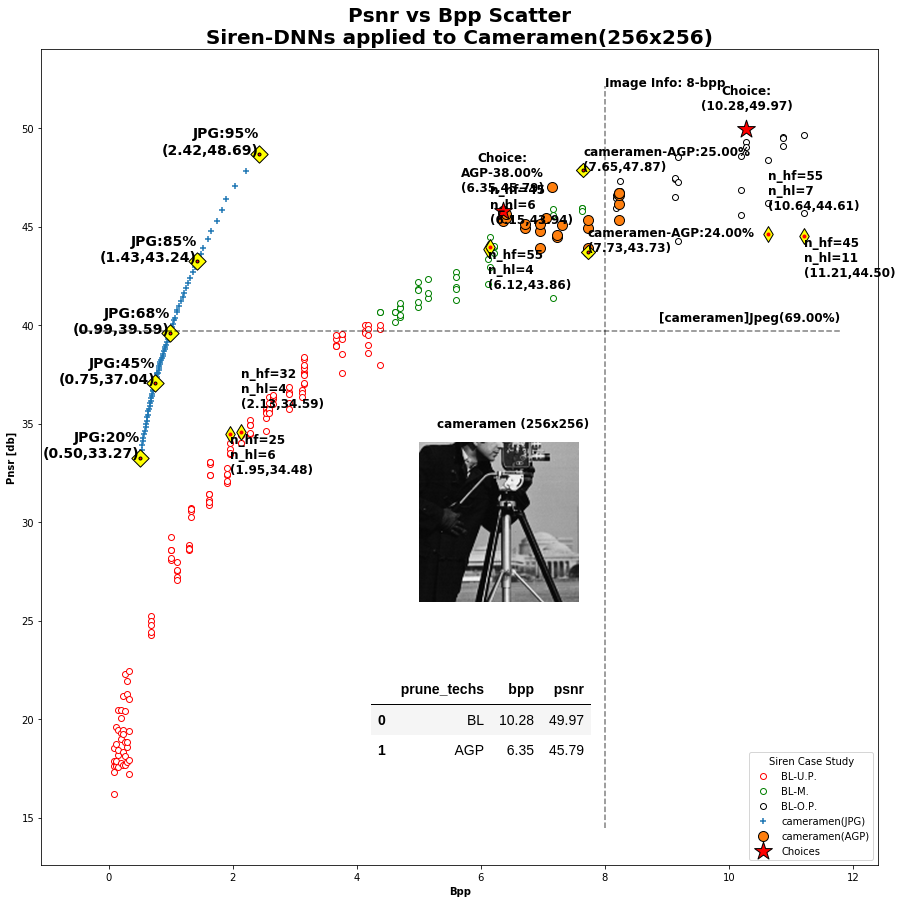

In [8]:
if SHOW_CAMERAMEN_FLAG:
    image_details = dict(
        image_name="cameramen",
        data_shown="jpeg_pruned_siren_1",
        root_dir=ROOT_DIR_CAMERAMEN,
    )
    fig_name, fig, ax = cameramen_cplots.show_image_jpeg_pruned_siren_bpp_vs_psnr_scatter(
        a_quant_df=quanted_cameramen_df,
        image_details=image_details,
        pairs_hf_hl=pairs_hf_hl
    )
    figures_list.append(fig_name)
    pass

**_Plot just Jpeg and Plain Siren-DNNs, and Pruned Quanted Models - for Cameramen 256x256 Image._**

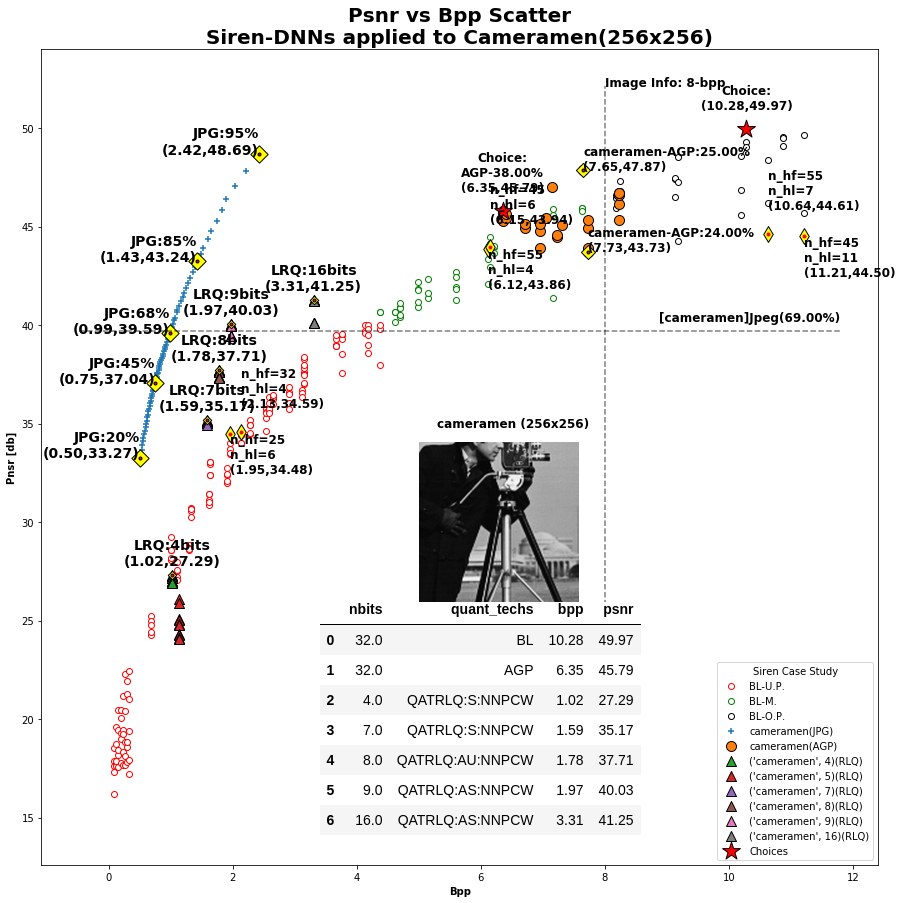

In [9]:
if SHOW_CAMERAMEN_FLAG:
    image_details = dict(
        image_name="cameramen",
        data_shown="jpeg_quanted_siren_1",
        root_dir=ROOT_DIR_CAMERAMEN,
    )
    fig_name, fig, ax = cameramen_cplots.show_image_jpeg_quanted_siren_bpp_vs_psnr_scatter(
        a_quant_df=quanted_cameramen_df,
        image_details=image_details,
        pairs_hf_hl=pairs_hf_hl
    )
    figures_list.append(fig_name)
    pass

## Cameramen case study: AGP 25% QATRLQ 16,9,8,7,4
---

In [10]:
quant_cameramen_dataset_path = "tmp_cameramen_quant_dataset.csv"
if not os.path.exists(f"{quant_cameramen_dataset_path}"):
    ROOT_DIRS: list = [
        "/media/franec94/Elements/Francesco/THESYS/FROM_DESKTOP/tmp_iside/tmp_qat/cameramen/cameramen_1",
        "/media/franec94/Elements/Francesco/THESYS/FROM_DESKTOP/tmp_iside/tmp_qat/cameramen/cameramen_2",
        "/media/franec94/Elements/Francesco/THESYS/FROM_DESKTOP/tmp_iside/tmp_qat/cameramen/cameramen_3",
        "/media/franec94/Elements/Francesco/THESYS/FROM_DESKTOP/tmp_iside/tmp_qat/cameramen/cameramen_4",
    ]
    quant_df = cameramen_cqd.create_quant_dataset(root_dirs_list=ROOT_DIRS)
    quant_df.to_csv(f"{quant_cameramen_dataset_path}")
    pass
else:
    quant_df = pd.read_csv(f"{quant_cameramen_dataset_path}")
    pass

**_Plot just Jpeg and Plain Siren trained DNNs - for Cameramen 256x256 Input Image._**

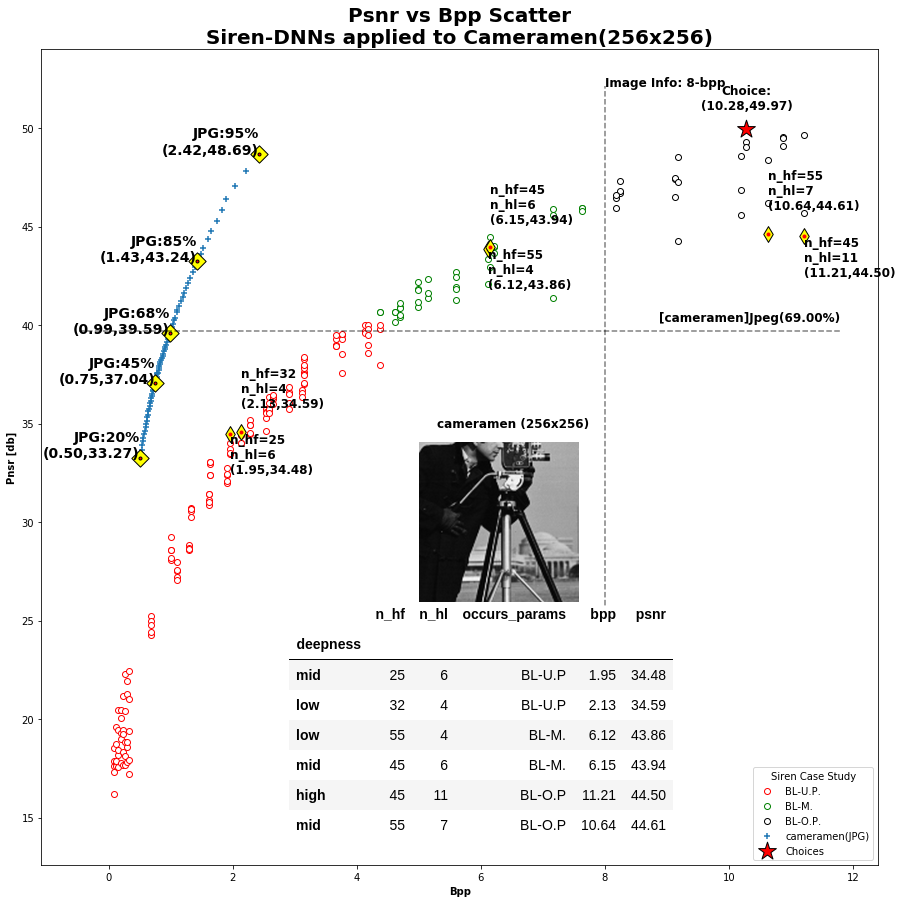

In [11]:
if SHOW_CAMERAMEN_FLAG:
    image_details = dict(
        image_name="cameramen",
        data_shown="jpeg_plain_siren_2",
        root_dir=ROOT_DIR_CAMERAMEN,
    )
    fig_name, fig, ax = cameramen_cplots.show_image_jpeg_plain_siren_bpp_vs_psnr_scatter(
        image_details=image_details,
        pairs_hf_hl=pairs_hf_hl
    )
    pass

**_Plot Jpeg, Plain Siren trained DNNs, and Pruned Models - for Cameramen 256x256 Input Image._**

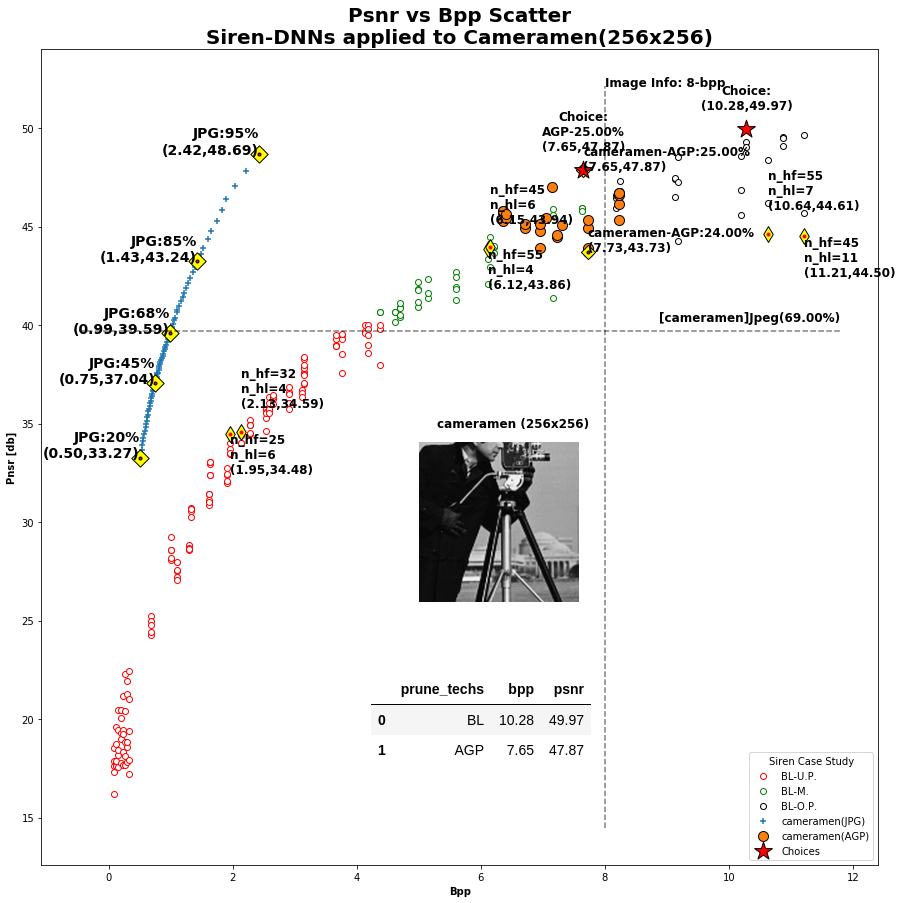

In [12]:
if SHOW_CAMERAMEN_FLAG:
    image_details = dict(
        image_name="cameramen",
        data_shown="jpeg_pruned_siren_2",
        root_dir=ROOT_DIR_CAMERAMEN,
    )
    fig_name, fig, ax = cameramen_cplots.show_image_jpeg_pruned_siren_bpp_vs_psnr_scatter(
        a_quant_df=quant_df,
        image_details=image_details,
        pairs_hf_hl=pairs_hf_hl
    )
    figures_list.append(fig_name)
    pass

**_Plot Jpeg, Plain Siren trained DNNs, Pruned and Quanted Models - for Cameramen 256x256 Input Image._**

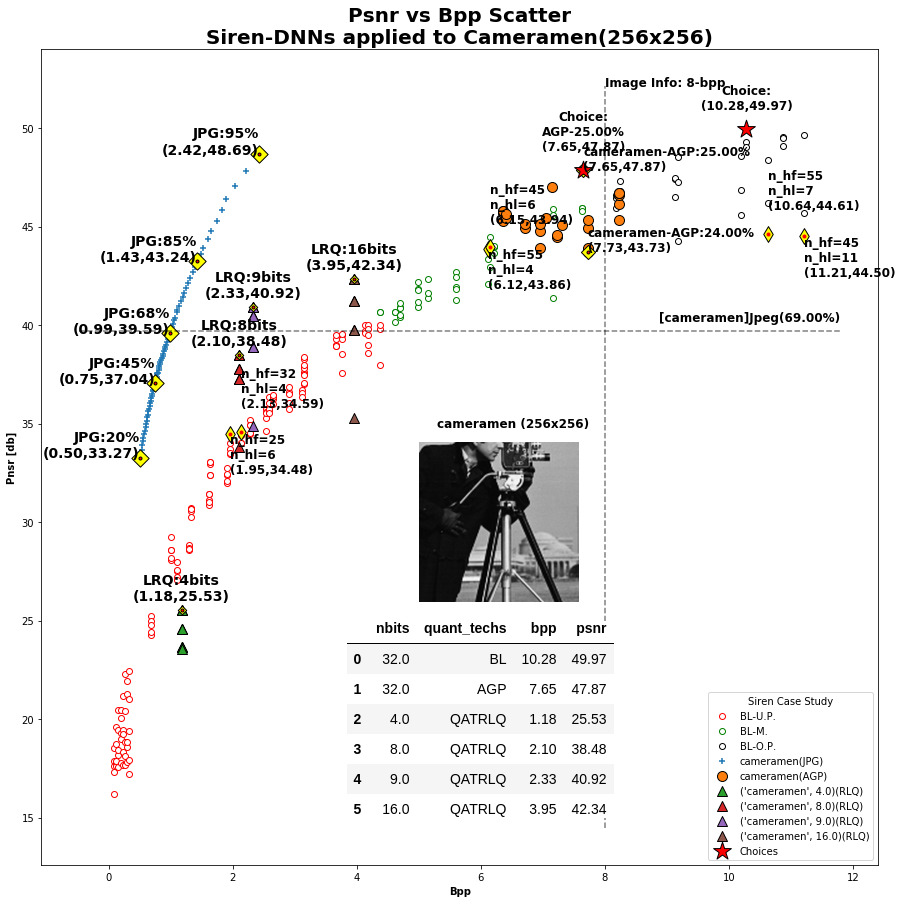

In [13]:
if SHOW_CAMERAMEN_FLAG:
    image_details = dict(
        image_name="cameramen",
        data_shown="jpeg_quanted_siren_2",
        root_dir=ROOT_DIR_CAMERAMEN,
    )
    fig_name, fig, ax = cameramen_cplots.show_image_jpeg_quanted_siren_bpp_vs_psnr_scatter(
        a_quant_df=quant_df,
        image_details=image_details,
        pairs_hf_hl=pairs_hf_hl
    )
    figures_list.append(fig_name)
    pass

In [14]:
quant_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 35 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         108 non-null    int64  
 1   experiment_date    108 non-null    object 
 2   date_train         108 non-null    object 
 3   date_test          108 non-null    object 
 4   init_from          108 non-null    object 
 5   root_dir           108 non-null    object 
 6   model_name         108 non-null    object 
 7   size_byte          108 non-null    object 
 8   footprint          108 non-null    object 
 9   psnr               108 non-null    float64
 10  bpp                108 non-null    float64
 11  CR                 108 non-null    object 
 12  mse                108 non-null    float64
 13  ssim               108 non-null    float64
 14  time               108 non-null    float64
 15  entropy            108 non-null    object 
 16  scheduler_name     108 non

In [15]:
quant_df.describe()

,Unnamed: 0,psnr,bpp,mse,ssim,time,prune_rate,num_epochs,n_hf,n_hl,w,h,L1,L2,lr,size_byte_th,nbits
count,108.00000,108.000000,108.000000,108.000000,108.000000,108.000000,108.0,108.0,108.0,108.0,108.0,108.0,108.0,108.0,108.000000,108.000000,108.000000
mean,53.50000,31.717242,2.390781,0.007174,0.871420,0.007729,25.0,500025.0,64.0,5.0,256.0,256.0,0.0,0.0,0.000075,19585.281250,9.250000
std,31.32092,6.239644,1.004451,0.010777,0.118011,0.000117,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000021,8228.465552,4.343058
min,0.00000,19.365660,1.176575,0.000233,0.457677,0.007473,25.0,500025.0,64.0,5.0,256.0,256.0,0.0,0.0,0.000050,9638.500000,4.000000
25%,26.75000,28.667786,1.870407,0.001077,0.865953,0.007663,25.0,500025.0,64.0,5.0,256.0,256.0,0.0,0.0,0.000050,15322.375000,7.000000
50%,53.50000,32.388048,2.217323,0.002312,0.904685,0.007715,25.0,500025.0,64.0,5.0,256.0,256.0,0.0,0.0,0.000075,18164.312500,8.500000
75%,80.25000,35.775658,2.737698,0.006005,0.945100,0.007771,25.0,500025.0,64.0,5.0,256.0,256.0,0.0,0.0,0.000100,22427.218750,10.750000
max,107.00000,42.341005,3.951904,0.046291,0.983510,0.008349,25.0,500025.0,64.0,5.0,256.0,256.0,0.0,0.0,0.000100,32374.000000,16.000000


## Test066 case study: AGP 25% QATRLQ 16,9,8,7,4
---

In [16]:
quant_test066_dataset_path = "tmp_test066_quant_dataset.csv"
if not os.path.exists(f"{quant_test066_dataset_path}"):
    ROOT_DIRS = [
        "/media/franec94/Elements/Francesco/THESYS/FROM_DESKTOP/tmp_iside/tmp_qat/test066_airplane/test066_airplane_1",
        "/media/franec94/Elements/Francesco/THESYS/FROM_DESKTOP/tmp_iside/tmp_qat/test066_airplane/test066_airplane_2",
        "/media/franec94/Elements/Francesco/THESYS/FROM_DESKTOP/tmp_iside/tmp_qat/test066_airplane/test066_airplane_3",
        "/media/franec94/Elements/Francesco/THESYS/FROM_DESKTOP/tmp_iside/tmp_qat/test066_airplane/test066_airplane_4"
    ]
    quant_test066_df = cameramen_cqd.create_quant_dataset(root_dirs_list=ROOT_DIRS, image_name="test066")
    quant_test066_df.to_csv(f"{quant_test066_dataset_path}")
else:
    quant_test066_df = pd.read_csv(f"{quant_test066_dataset_path}")
    pass

In [17]:
pick_cols = ["image_name", "psnr", "bpp", "quant_techs"]
quant_test066_df[pick_cols].head(5)

,image_name,psnr,bpp,quant_techs
0,test066,20.990915,1.088965,QuantAwareTrainRangeLinearQuantizer
1,test066,33.328851,1.717090,QuantAwareTrainRangeLinearQuantizer
2,test066,34.154727,1.926465,QuantAwareTrainRangeLinearQuantizer
3,test066,31.644701,2.135840,QuantAwareTrainRangeLinearQuantizer
4,test066,28.784891,3.601465,QuantAwareTrainRangeLinearQuantizer


In [18]:
quant_test066_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 34 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         153 non-null    int64  
 1   experiment_date    153 non-null    object 
 2   date_train         153 non-null    object 
 3   date_test          153 non-null    object 
 4   init_from          153 non-null    object 
 5   root_dir           153 non-null    object 
 6   model_name         153 non-null    object 
 7   size_byte          153 non-null    object 
 8   footprint          153 non-null    object 
 9   psnr               153 non-null    float64
 10  bpp                153 non-null    float64
 11  CR                 153 non-null    object 
 12  mse                153 non-null    float64
 13  ssim               153 non-null    float64
 14  time               153 non-null    float64
 15  entropy            153 non-null    object 
 16  scheduler_name     153 non

In [19]:
pos = quant_test066_df["psnr"] != "-"
quant_test066_df = quant_test066_df[pos]

vals = quant_test066_df["psnr"].values
quant_test066_df["psnr"] = list(map(float, vals))

In [20]:
quant_test066_df.describe()

,Unnamed: 0,psnr,bpp,mse,ssim,time,prune_rate,num_epochs,n_hf,n_hl,w,h,L1,L2,lr,size_byte_th,nbits
count,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,1.530000e+02,153.000000,153.0,153.0,153.0,153.0,153.0,153.0,153.000000,153.000000,153.000000
mean,76.000000,27.517871,2.488904,0.051621,0.756064,0.007712,3.219052e-01,543325.653595,64.0,5.0,256.0,256.0,0.0,0.0,0.000088,20389.098039,10.686275
std,44.311398,7.852976,0.876033,0.107532,0.206631,0.000109,7.797084e-16,27656.036975,0.0,0.0,0.0,0.0,0.0,0.0,0.000019,7176.465660,4.184040
min,0.000000,11.017155,1.088965,0.000902,0.283925,0.007475,3.219052e-01,525025.000000,64.0,5.0,256.0,256.0,0.0,0.0,0.000050,8920.800000,4.000000
25%,38.000000,27.991553,1.926465,0.002488,0.683922,0.007630,3.219052e-01,525025.000000,64.0,5.0,256.0,256.0,0.0,0.0,0.000075,15781.600000,8.000000
50%,76.000000,30.467212,2.135840,0.003592,0.866775,0.007701,3.219052e-01,525025.000000,64.0,5.0,256.0,256.0,0.0,0.0,0.000100,17496.800000,9.000000
75%,114.000000,32.062440,3.601465,0.006352,0.889230,0.007770,3.219052e-01,550025.000000,64.0,5.0,256.0,256.0,0.0,0.0,0.000100,29503.200000,16.000000
max,152.000000,36.472452,3.601465,0.316479,0.928309,0.008177,3.219052e-01,625025.000000,64.0,5.0,256.0,256.0,0.0,0.0,0.000100,29503.200000,16.000000


**_Plot just Jpeg and Plain Siren-DNNs - for Test066 Airplane 256x256 Image._**

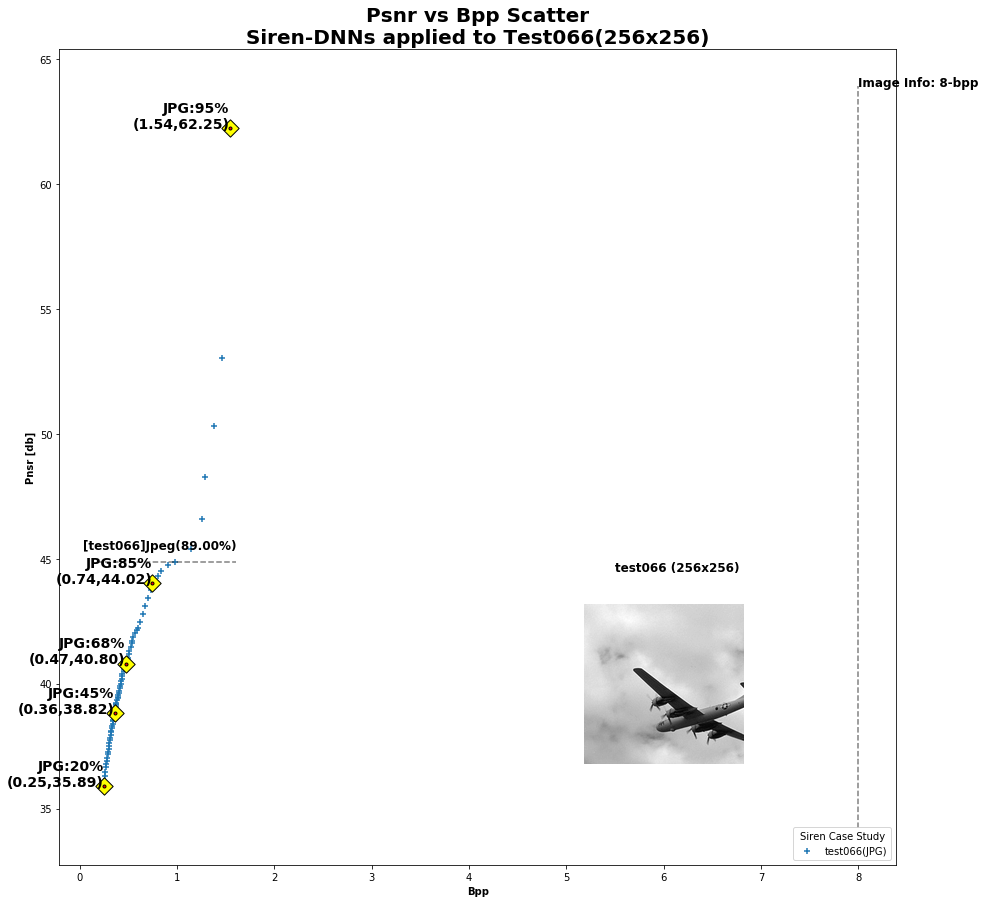

In [21]:
if SHOW_TEST066_FLAG:
    image_details = dict(
        image_name="test066",
        data_shown="jpeg_plain_siren",
        root_dir=ROOT_DIR_TEST066,
    )
    fig_name, fig, ax = cameramen_cplots.show_image_jpeg_plain_siren_bpp_vs_psnr_scatter(
        image_details=image_details,
        pairs_hf_hl=pairs_hf_hl
    )
    figures_list.append(fig_name)
    pass

**_Plot just Jpeg and Plain Siren-DNNs, and Pruned Models - for Test066 Airplane 256x256 Image._**

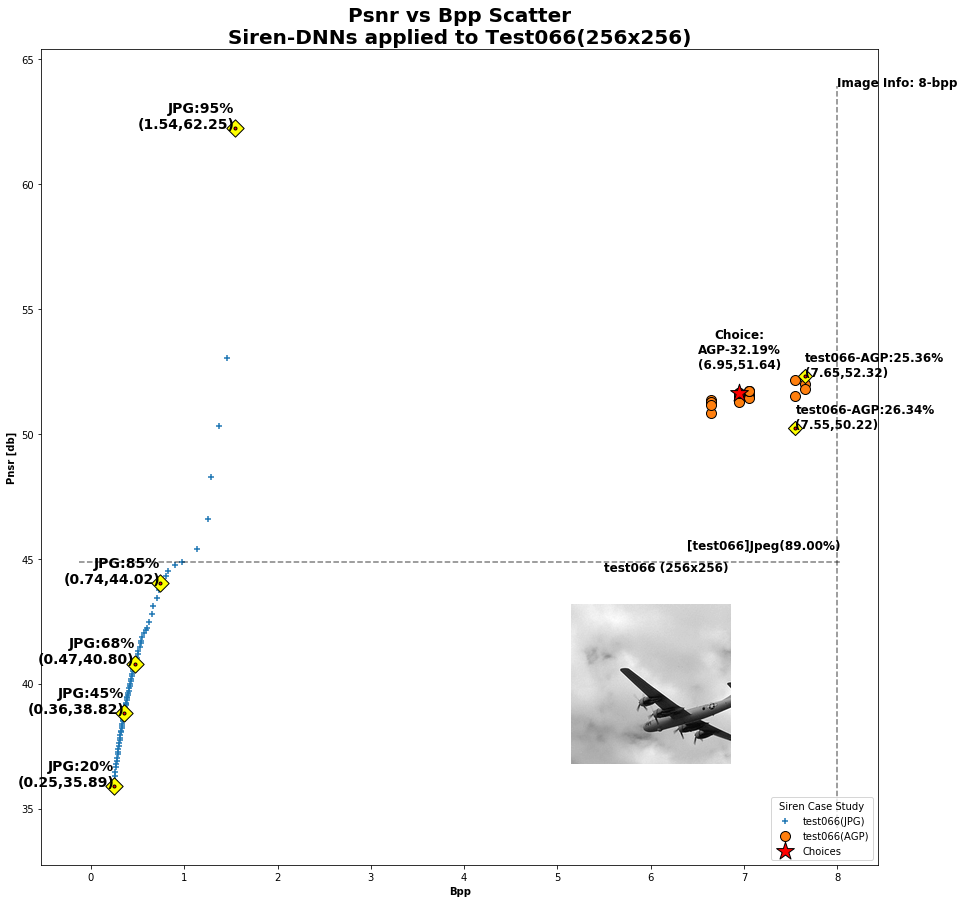

In [22]:
if SHOW_TEST066_FLAG:
    image_details = dict(
        image_name="test066",
        data_shown="jpeg_pruned_siren",
        root_dir=ROOT_DIR_TEST066
    )
    fig_name, fig, ax = cameramen_cplots.show_image_jpeg_pruned_siren_bpp_vs_psnr_scatter(
        a_quant_df=quant_test066_df,
        image_details=image_details,
        pairs_hf_hl=pairs_hf_hl
    )
    figures_list.append(fig_name)
    pass

**_Plot just Jpeg and Plain Siren-DNNs, and Pruned Quanted Models - for Test066 Airplane 256x256 Image._**

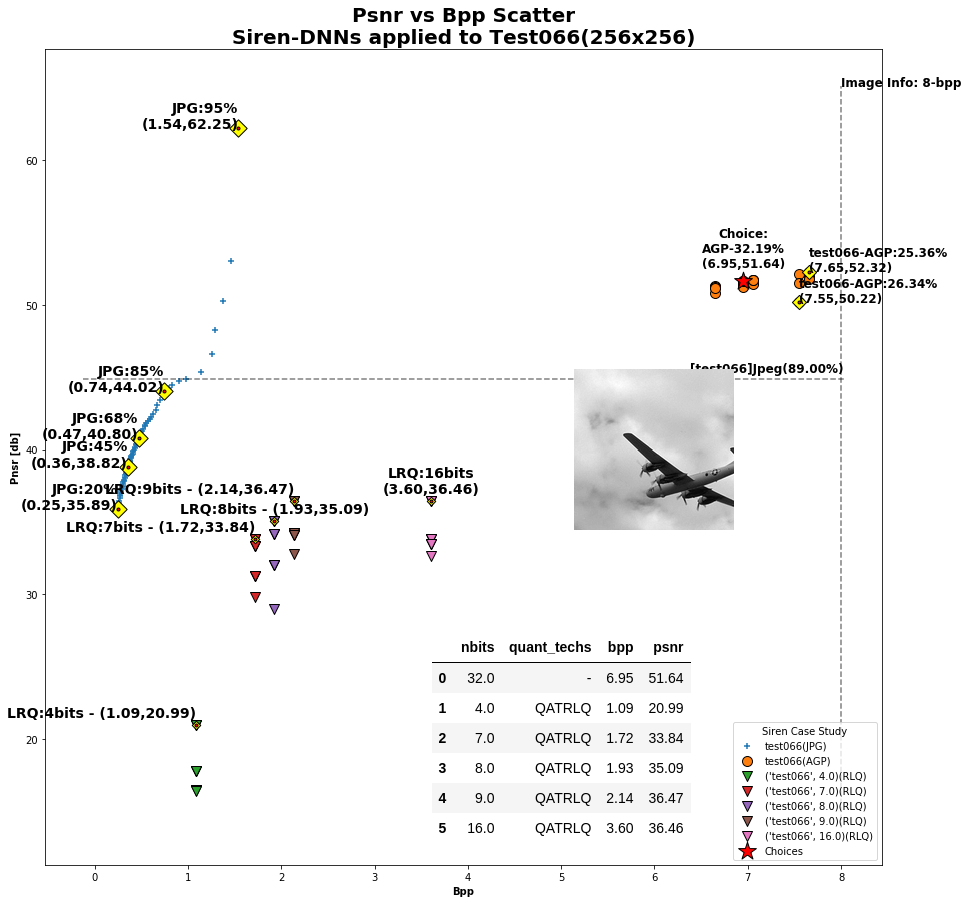

In [23]:
if SHOW_TEST066_FLAG:
    image_details = dict(
        image_name="test066",
        data_shown="jpeg_quanted_siren",
        quant_pos_alignment="right,right,center,right,center".split(","),
        quant_on_a_line=[True, True, True, True, False],
        x_tb=5, y_tb=20,
        root_dir=ROOT_DIR_TEST066
    )
    fig_name, fig, ax = cameramen_cplots.show_image_jpeg_quanted_siren_bpp_vs_psnr_scatter(
        a_quant_df=quant_test066_df,
        image_details=image_details,
        pairs_hf_hl=pairs_hf_hl
    )
    figures_list.append(fig_name)
    pass

## Merge all created Images
---

In [24]:
import PyPDF2
import img2pdf
import fitz
def save_all_images_as_merged_pdf(figures_list: list, out_dir:str='.', out_merged_file:str="merged.pdf"):
    """TODO Comment it."""
    pdf_filename =  os.path.join(
        out_dir, f"{out_merged_file}")
    
    doc = fitz.open()                            # PDF with the pictures
    for i, f in enumerate(figures_list):
        img = fitz.open(f) # open pic as document
        rect = img[0].rect                       # pic dimension
        pdfbytes = img.convertToPDF()            # make a PDF stream
        img.close()                              # no longer needed
        imgPDF = fitz.open("pdf", pdfbytes)      # open stream as PDF
        page = doc.newPage(width = rect.width,   # new page with ...
                           height = rect.height) # pic dimension
        page.showPDFpage(rect, imgPDF, 0) 
               # image fills the page
    doc.save(pdf_filename)
    pass

**_Merge all created images into a final .PDF output file_**

In [25]:
image_name="merged_cameramen_test066"
out_merged_file=f"{image_name}_siren.pdf"
out_merged_file=os.path.join(ROOT_DIR, out_merged_file)
save_all_images_as_merged_pdf(figures_list=figures_list, out_merged_file=f"{out_merged_file}")